# Regression Trees and Aggregation

8 november 2018, slides 70-

Tree structures can also be used for performing regression: the **regression tree** is quite similar to a normal decision tree, but it has some major differences:

* We change the most common class in y, noted as $\hat{y}$, with the average of the values in y, noted $\bar{y}$.

* We change the best branch function by substituting the classification error $E(x)$ with the $arg min$ of the $RSS$ for the two splits.

* We change the stopping criterion by stopping when RSS is 0 instead of stopping if $y$ contains only one class.

We are basically building the tree based on the regression line for the points in the dataset.

The biggest limitation for this kind of trees is the fact **we cannot model diagonal patterns easily**. This causes a model complexity for those cases which is way higher than the one of the underlying system.

**Trees pros:**

* Easily interpretable/explicable

* Can perform both regression and classification in an understandable way

* Can handle both categorical and numerical values

**Trees cons:**

* Not so accurate in some specific cases (diagonal systems)

# Laboratory: Tree on Iris Dataset

In [6]:
library(tree)
attach(iris)

The following objects are masked from iris (pos = 4):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species

The following objects are masked from iris (pos = 5):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species



In [42]:
tree_s   <- tree(Species ~ ., data = iris, wts = TRUE)
tree_pl  <- tree(Petal.Length ~ ., data = iris)
tree_pw  <- tree(Petal.Width ~ ., data = iris)
tree_sl  <- tree(Sepal.Length ~ ., data = iris)
tree_sw  <- tree(Sepal.Width ~ ., data = iris)

In [38]:
summary(tree_s)


Classification tree:
tree(formula = Species ~ ., data = iris, wts = T)
Variables actually used in tree construction:
[1] "Petal.Length" "Petal.Width"  "Sepal.Length"
Number of terminal nodes:  6 
Residual mean deviance:  0.1253 = 18.05 / 144 
Misclassification error rate: 0.02667 = 4 / 150 

[1] "frame"   "where"   "terms"   "call"    "y"       "weights"

In [14]:
summary(tree_pl)


Regression tree:
tree(formula = Petal.Length ~ ., data = iris)
Variables actually used in tree construction:
[1] "Petal.Width"  "Species"      "Sepal.Length"
Number of terminal nodes:  5 
Residual mean deviance:  0.09039 = 13.11 / 145 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.8225 -0.2158  0.0190  0.0000  0.1886  0.6842 

In [15]:
summary(tree_pw)


Regression tree:
tree(formula = Petal.Width ~ ., data = iris)
Variables actually used in tree construction:
[1] "Species"      "Petal.Length" "Sepal.Width" 
Number of terminal nodes:  5 
Residual mean deviance:  0.02916 = 4.228 / 145 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.52420 -0.10420 -0.02424  0.00000  0.08966  0.47580 

In [16]:
summary(tree_sl)


Regression tree:
tree(formula = Sepal.Length ~ ., data = iris)
Variables actually used in tree construction:
[1] "Petal.Length" "Sepal.Width" 
Number of terminal nodes:  7 
Residual mean deviance:  0.0984 = 14.07 / 143 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.15500 -0.17580  0.02626  0.00000  0.19600  0.74550 

In [17]:
summary(tree_sw)


Regression tree:
tree(formula = Sepal.Width ~ ., data = iris)
Variables actually used in tree construction:
[1] "Petal.Length" "Sepal.Length" "Petal.Width" 
Number of terminal nodes:  10 
Residual mean deviance:  0.06268 = 8.776 / 140 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.60560 -0.16780  0.03182  0.00000  0.16280  0.63180 

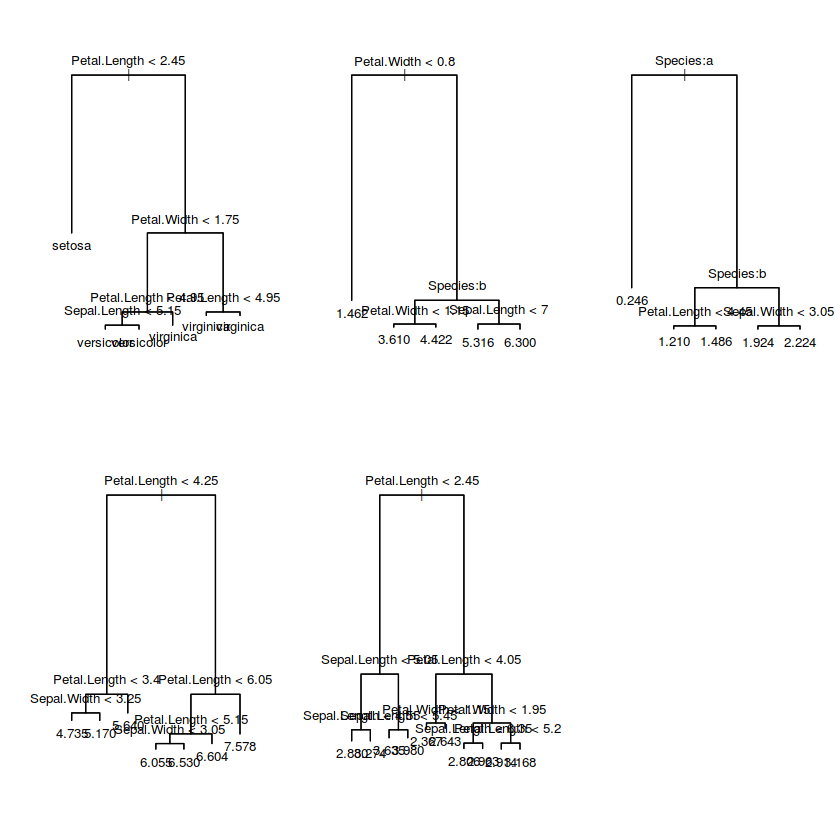

In [21]:
par(mfrow=c(2,3))
plot(tree_s)
text(tree_s)
plot(tree_pl)
text(tree_pl)
plot(tree_pw)
text(tree_pw)
plot(tree_sl)
text(tree_sl)
plot(tree_sw)
text(tree_sw)

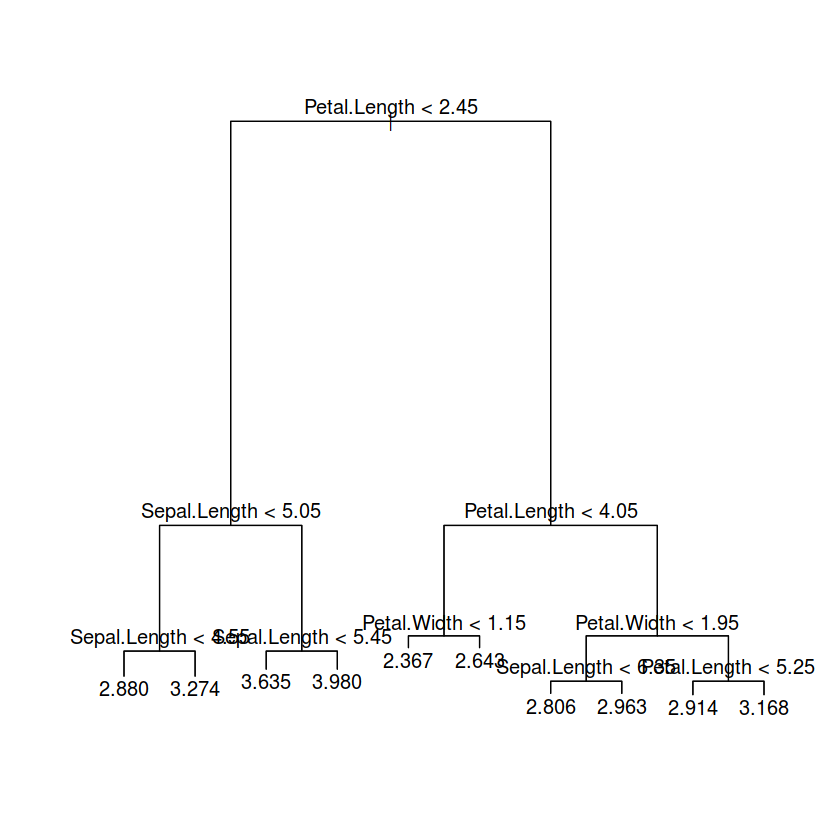

In [22]:
plot(tree_sw)
text(tree_sw)

# Summing up the lab

* We are looking for the variable in the `iris` set which is the harder to predict given the others by using trees.

* Assuming that the hardest variable generates a model with the highest complexity, we generate the trees for all the cases without setting any constraint on their depth.

* We can see that the tree generated for predicting `Sepal.Width` is the most complex, which makes it a reasonable bet for the hardest variable.

* We could calculate the errors of our models to verify that assumption.